# Predict the price of a camera based on certain features

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
df = pd.read_csv('camera_dataset.csv')
peek = df.head()
peek

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [154]:
df.shape

(1038, 13)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [156]:
# summarize the number of unique values in each column, if the column has only one unique value, it is not useful for prediction
pd.set_option('display.max_rows', 50)
df.nunique()

Model                      1038
Release date                 14
Max resolution               99
Low resolution               70
Effective pixels             16
Zoom wide (W)                25
Zoom tele (T)               100
Normal focus range           32
Macro focus range            29
Storage included             44
Weight (inc. batteries)     237
Dimensions                  101
Price                        43
dtype: int64

In [157]:
# Look for missing values
print('total missing values:', df.isnull().sum().sum())
print('column name with missing values:', df.columns[df.isnull().any()])


total missing values: 7
column name with missing values: Index(['Macro focus range', 'Storage included', 'Weight (inc. batteries)',
       'Dimensions'],
      dtype='object')


In [158]:
# summarize the percentage of unique values for each column
for i in range(df.shape[1]):
    num = len(df.iloc[:, i].unique())
    percentage = float(num) / df.shape[0] * 100
    if percentage < 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))

In [159]:
# since the columns with missing values are continuous ND, we handle the missing values by replacing them with the mean of the column
col_name = ['Macro focus range', 'Storage included', 'Weight (inc. batteries)', 'Dimensions']

for i in col_name:
    df[i].fillna(df[i].mean(), inplace=True)

# Check if there are still missing values
df.isnull().sum().sum()

0

In [160]:
# check in colum weight (inc. batteries) if there are values that are zero and replace them with the mean
df['Weight (inc. batteries)'].replace(0, df['Weight (inc. batteries)'].mean(), inplace=True)
df['Dimensions'].replace(0, df['Dimensions'].mean(), inplace=True)

In [161]:
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.00,95.00,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.00,158.00,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,319.27,105.36,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,319.27,105.36,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.00,128.00,1299.0


In [162]:
# Look for duplicates
df.duplicated().sum()

0

In [163]:
pd.set_option('display.precision', 2)
df.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00,1038.00
mean,2003.59,2474.67,1773.94,4.60,32.96,121.53,44.15,7.79,17.45,325.72,106.78,457.38
std,2.72,759.51,830.90,2.84,10.33,93.46,24.14,8.10,27.41,256.08,20.87,760.45
min,1994.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,30.00,14.00
25%,2002.00,2048.00,1120.00,3.00,35.00,96.00,30.00,3.00,8.00,181.50,92.25,149.00
50%,2004.00,2560.00,2048.00,4.00,36.00,108.00,50.00,6.00,16.00,230.00,103.00,199.00
75%,2006.00,3072.00,2560.00,7.00,38.00,117.00,60.00,10.00,20.00,347.50,115.00,399.00
max,2007.00,5616.00,4992.00,21.00,52.00,518.00,120.00,85.00,450.00,1860.00,240.00,7999.00


## Visualize the data distribution

### Univariate plot analysis

In [164]:
# function for plotting the distribution of the data

def plot_for_distribution(df, col, plotfunc):
  fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(25, 15))
  index = 0
  axs = axs.flatten()

  for col in df.columns:
    if(col == 'Model'):
        continue
    plotfunc(data=df[col], ax=axs[index])
    ax = axs[index]
    index += 1
  plt.show()


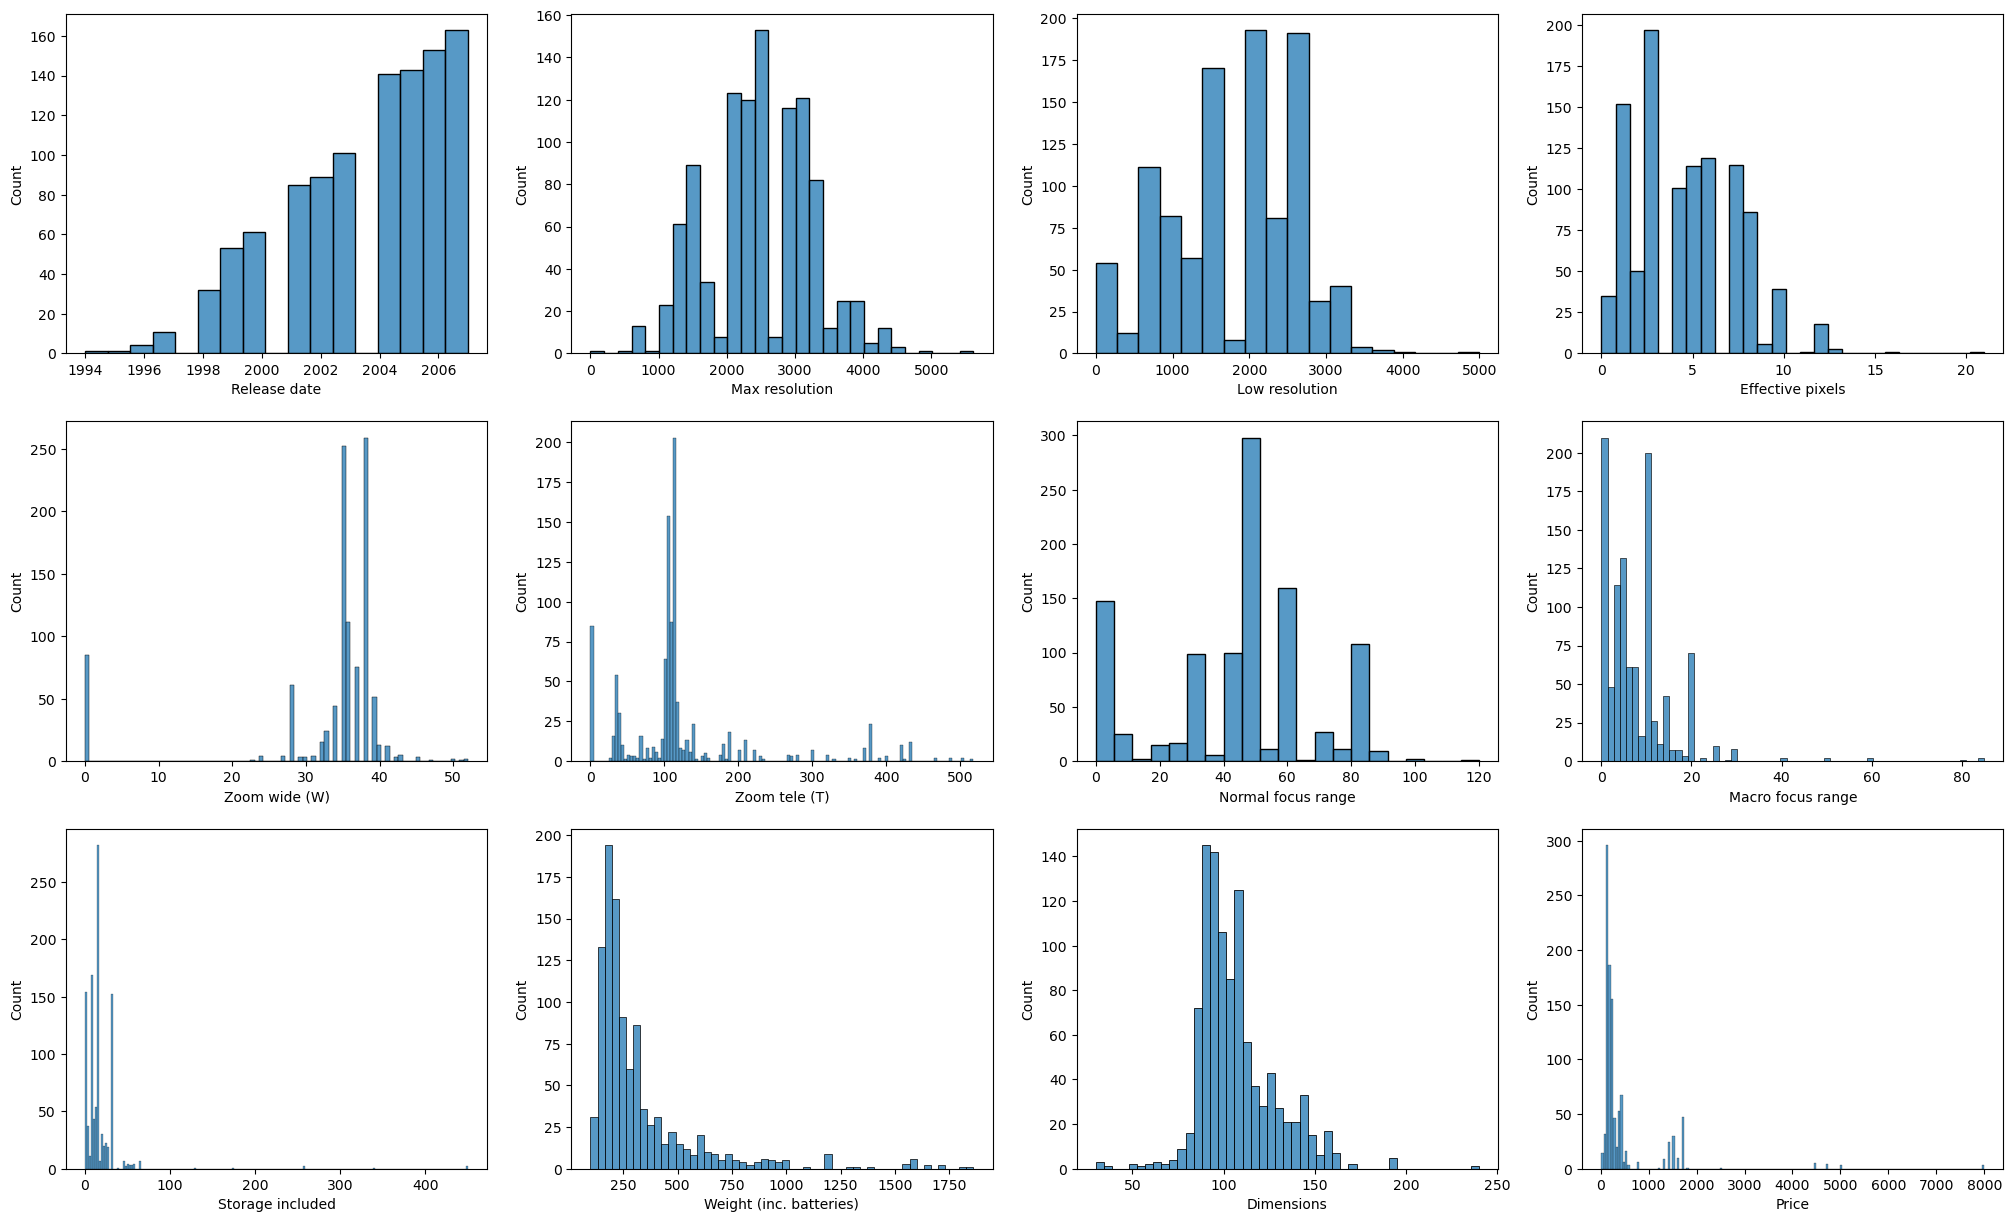

In [165]:
# histplot
plot_for_distribution(df, df.columns, sns.histplot)

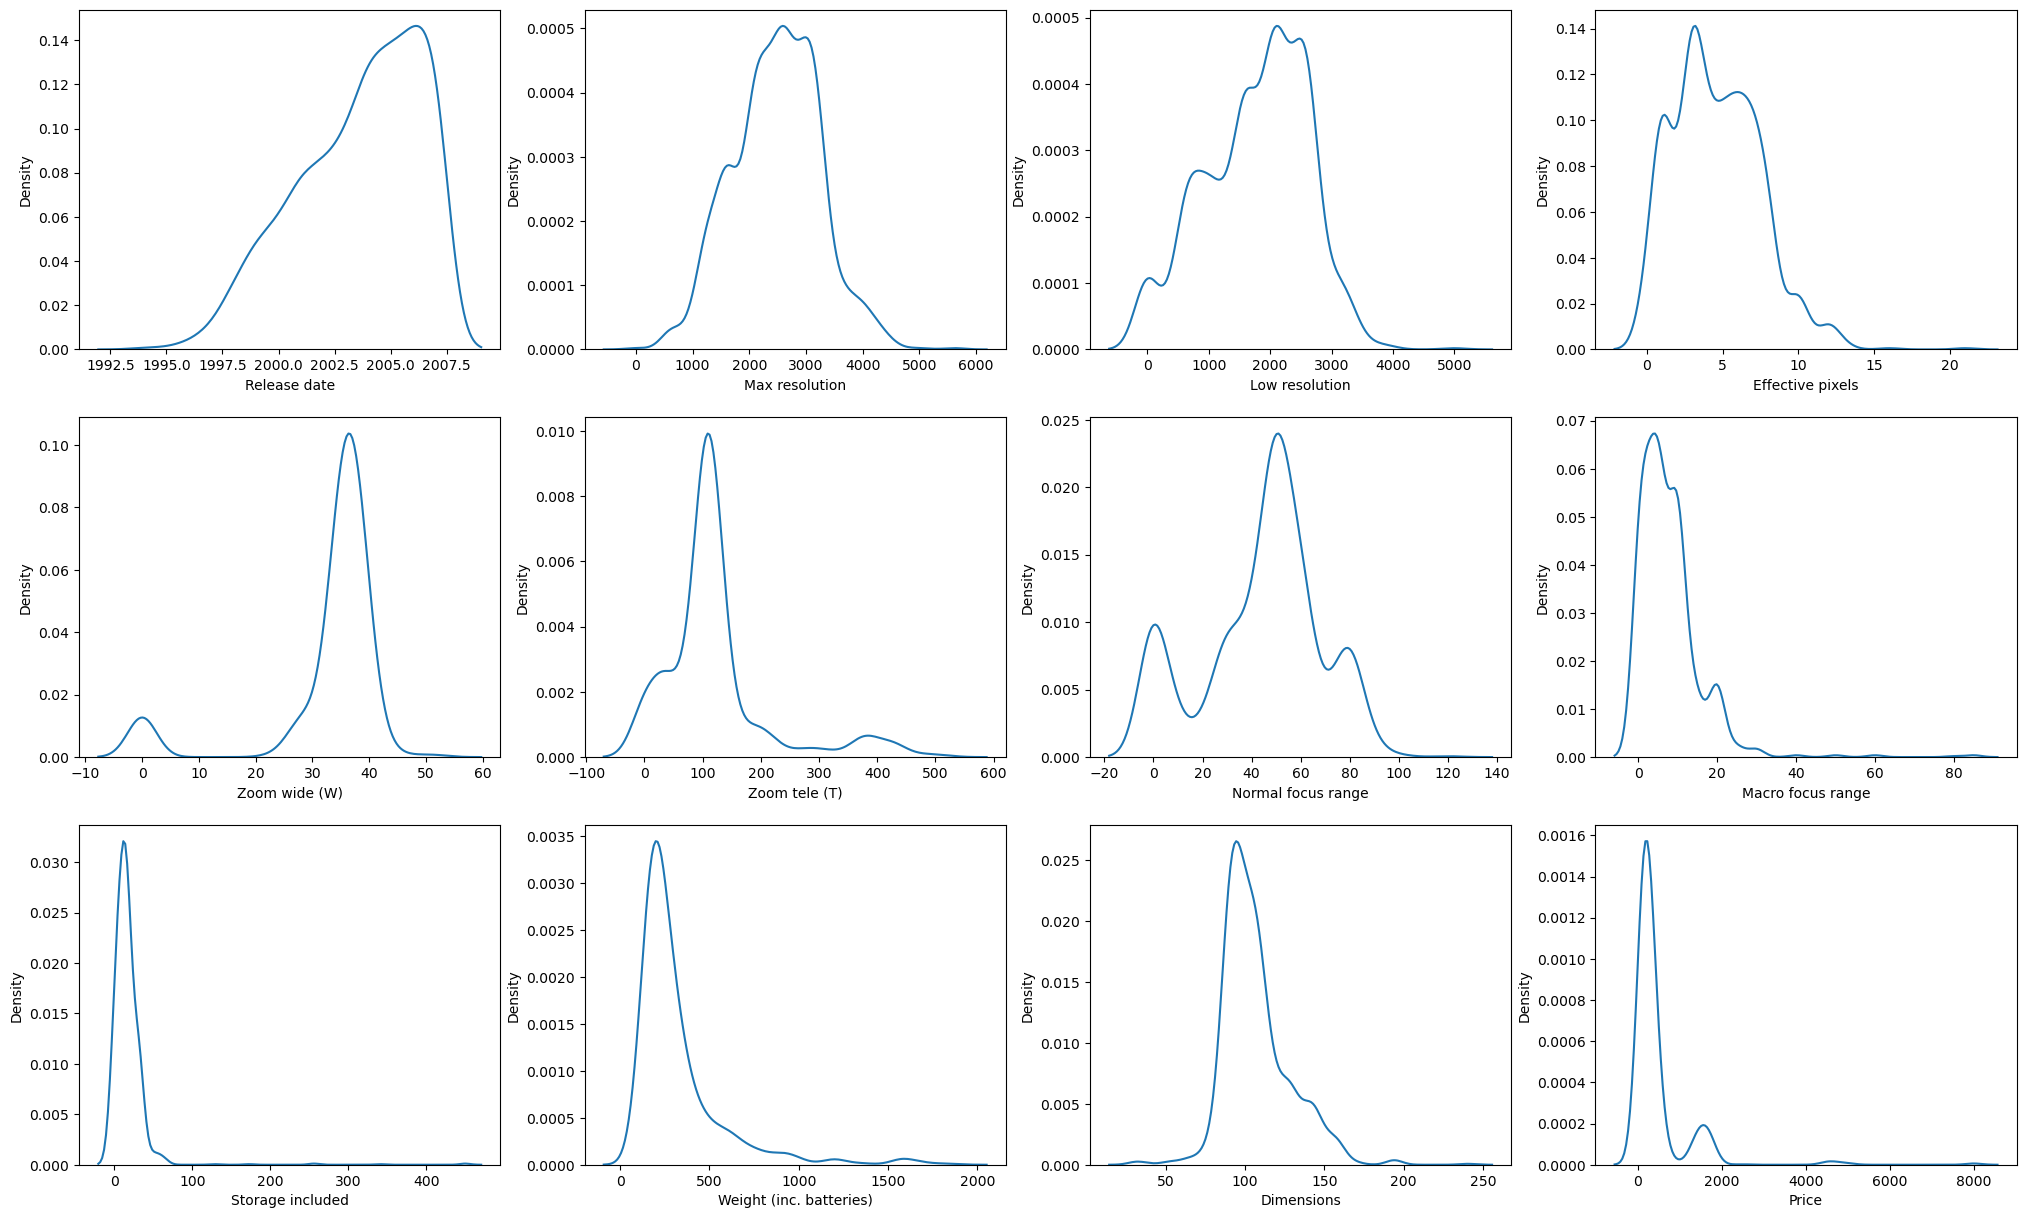

In [166]:
# kde plot
plot_for_distribution(df, df.columns, sns.kdeplot)

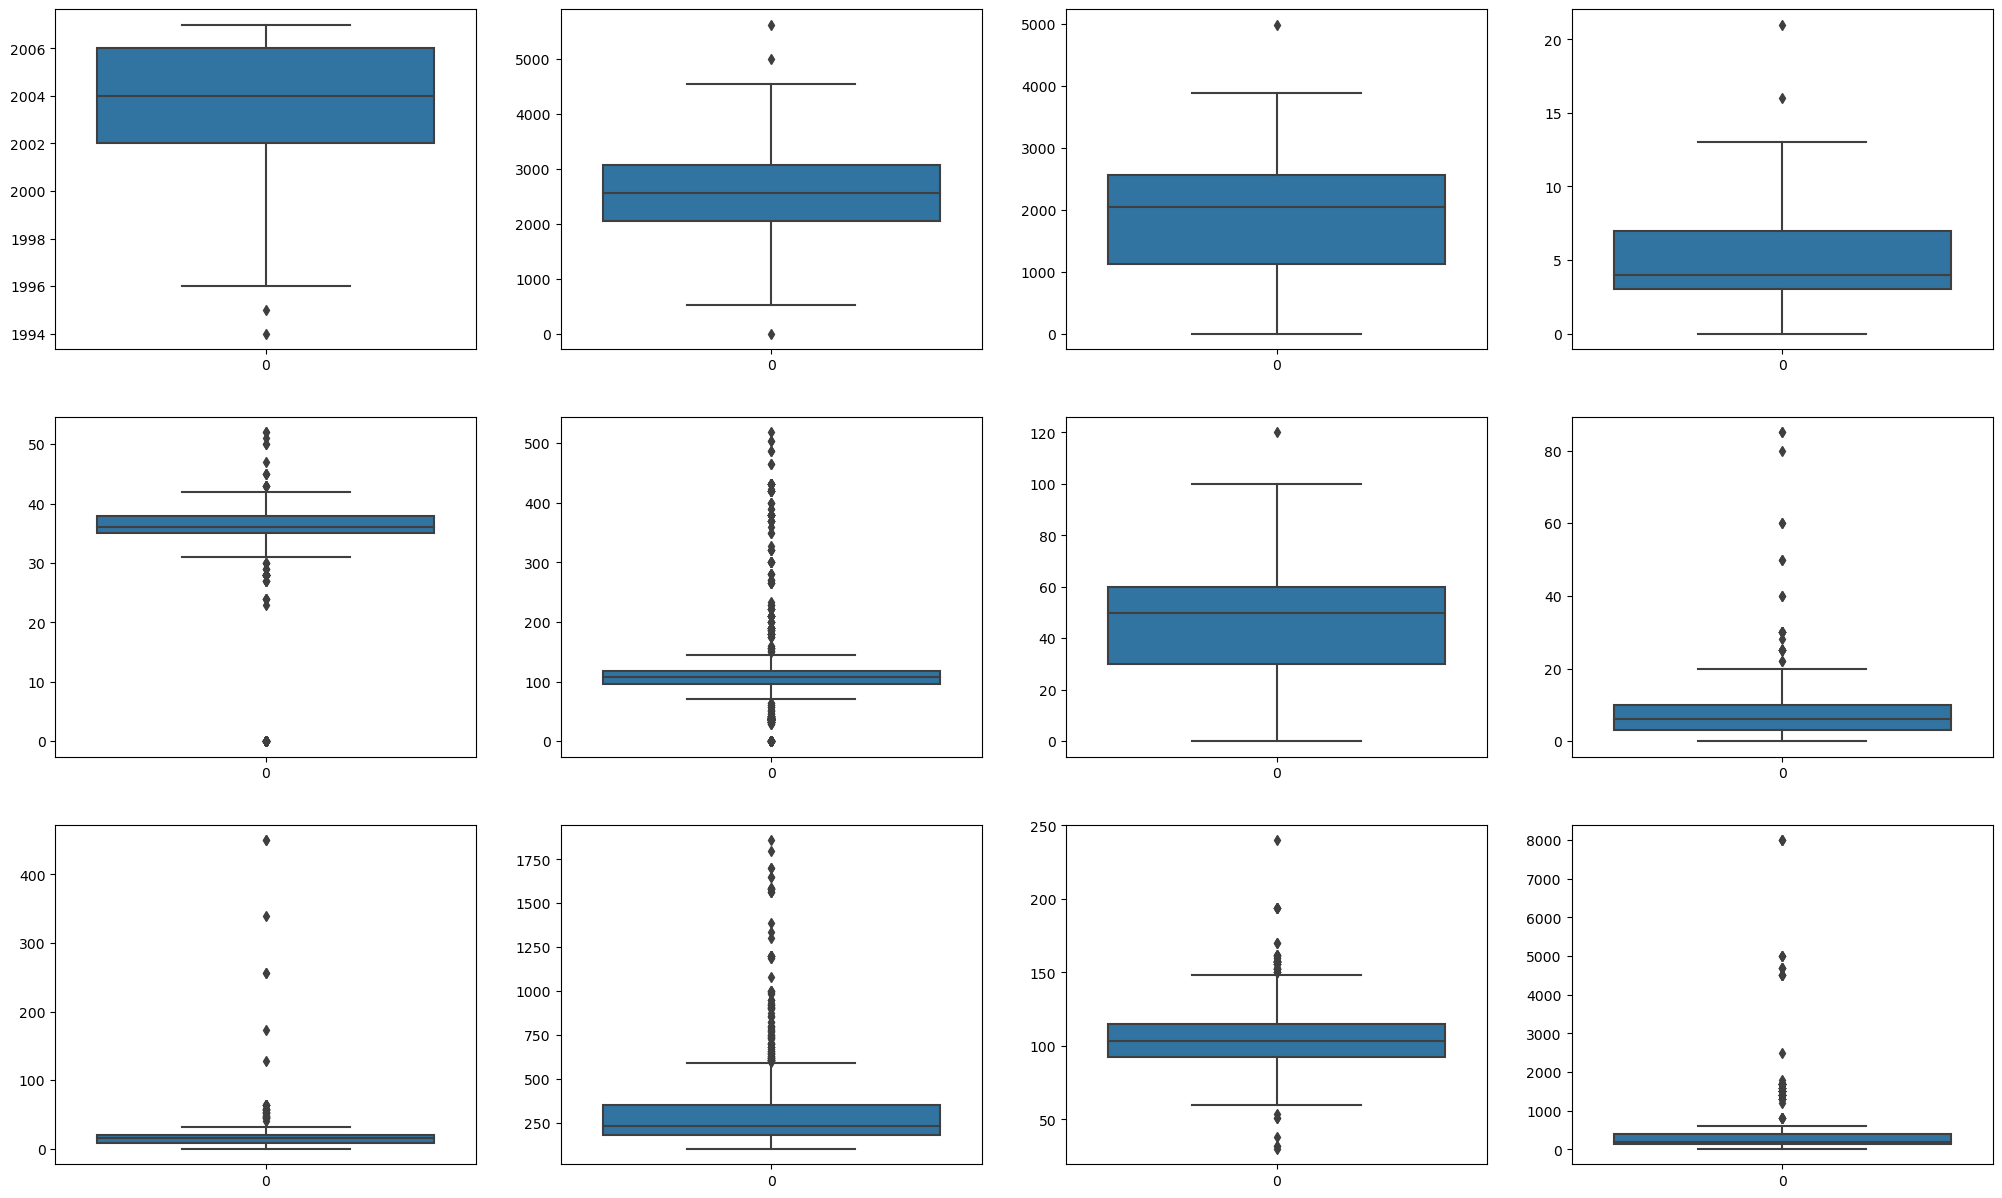

In [167]:
# boxplot
plot_for_distribution(df, df.columns, sns.boxplot)

In [168]:
# check for skewness in the data
pd.set_option('display.max_rows', 12)
skew = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)
print('skewness:', skew, '\n')
print('kurtosis:', kurtosis)


skewness: Release date               -0.61
Max resolution              0.02
Low resolution             -0.30
Effective pixels            0.63
Zoom wide (W)              -2.58
Zoom tele (T)               1.88
Normal focus range         -0.41
Macro focus range           3.65
Storage included           10.73
Weight (inc. batteries)     2.93
Dimensions                  1.05
Price                       5.19
dtype: float64 

kurtosis: Release date                -0.46
Max resolution               0.07
Low resolution              -0.39
Effective pixels             0.79
Zoom wide (W)                5.63
Zoom tele (T)                3.97
Normal focus range          -0.42
Macro focus range           25.72
Storage included           148.35
Weight (inc. batteries)     10.34
Dimensions                   3.14
Price                       37.08
dtype: float64


<AxesSubplot:>

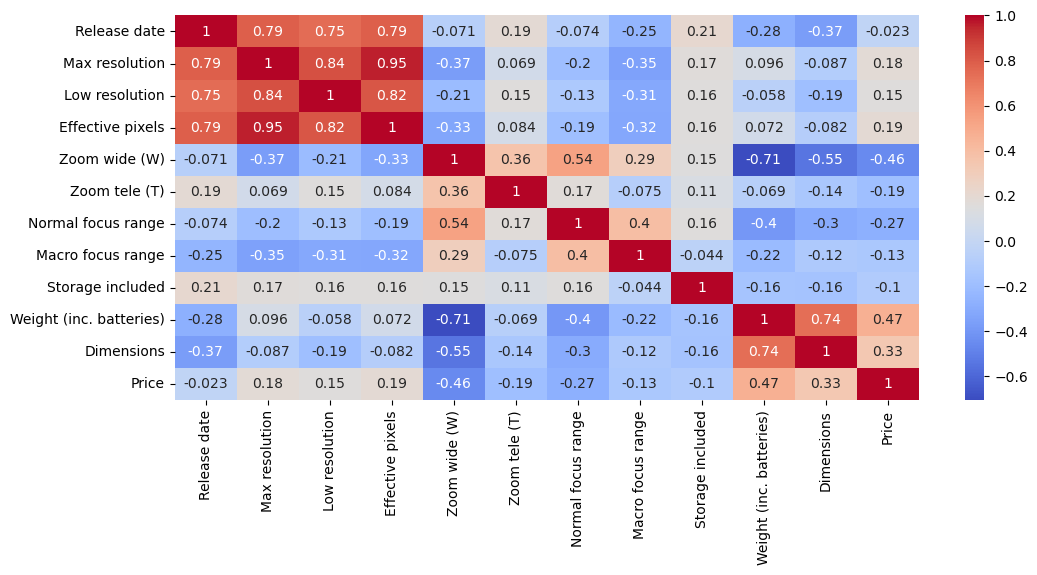

In [169]:
# pd.set_option('display.max_rows', 12)
df_corr = df.corr(method='pearson')
plt.figure(figsize=(12, 5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

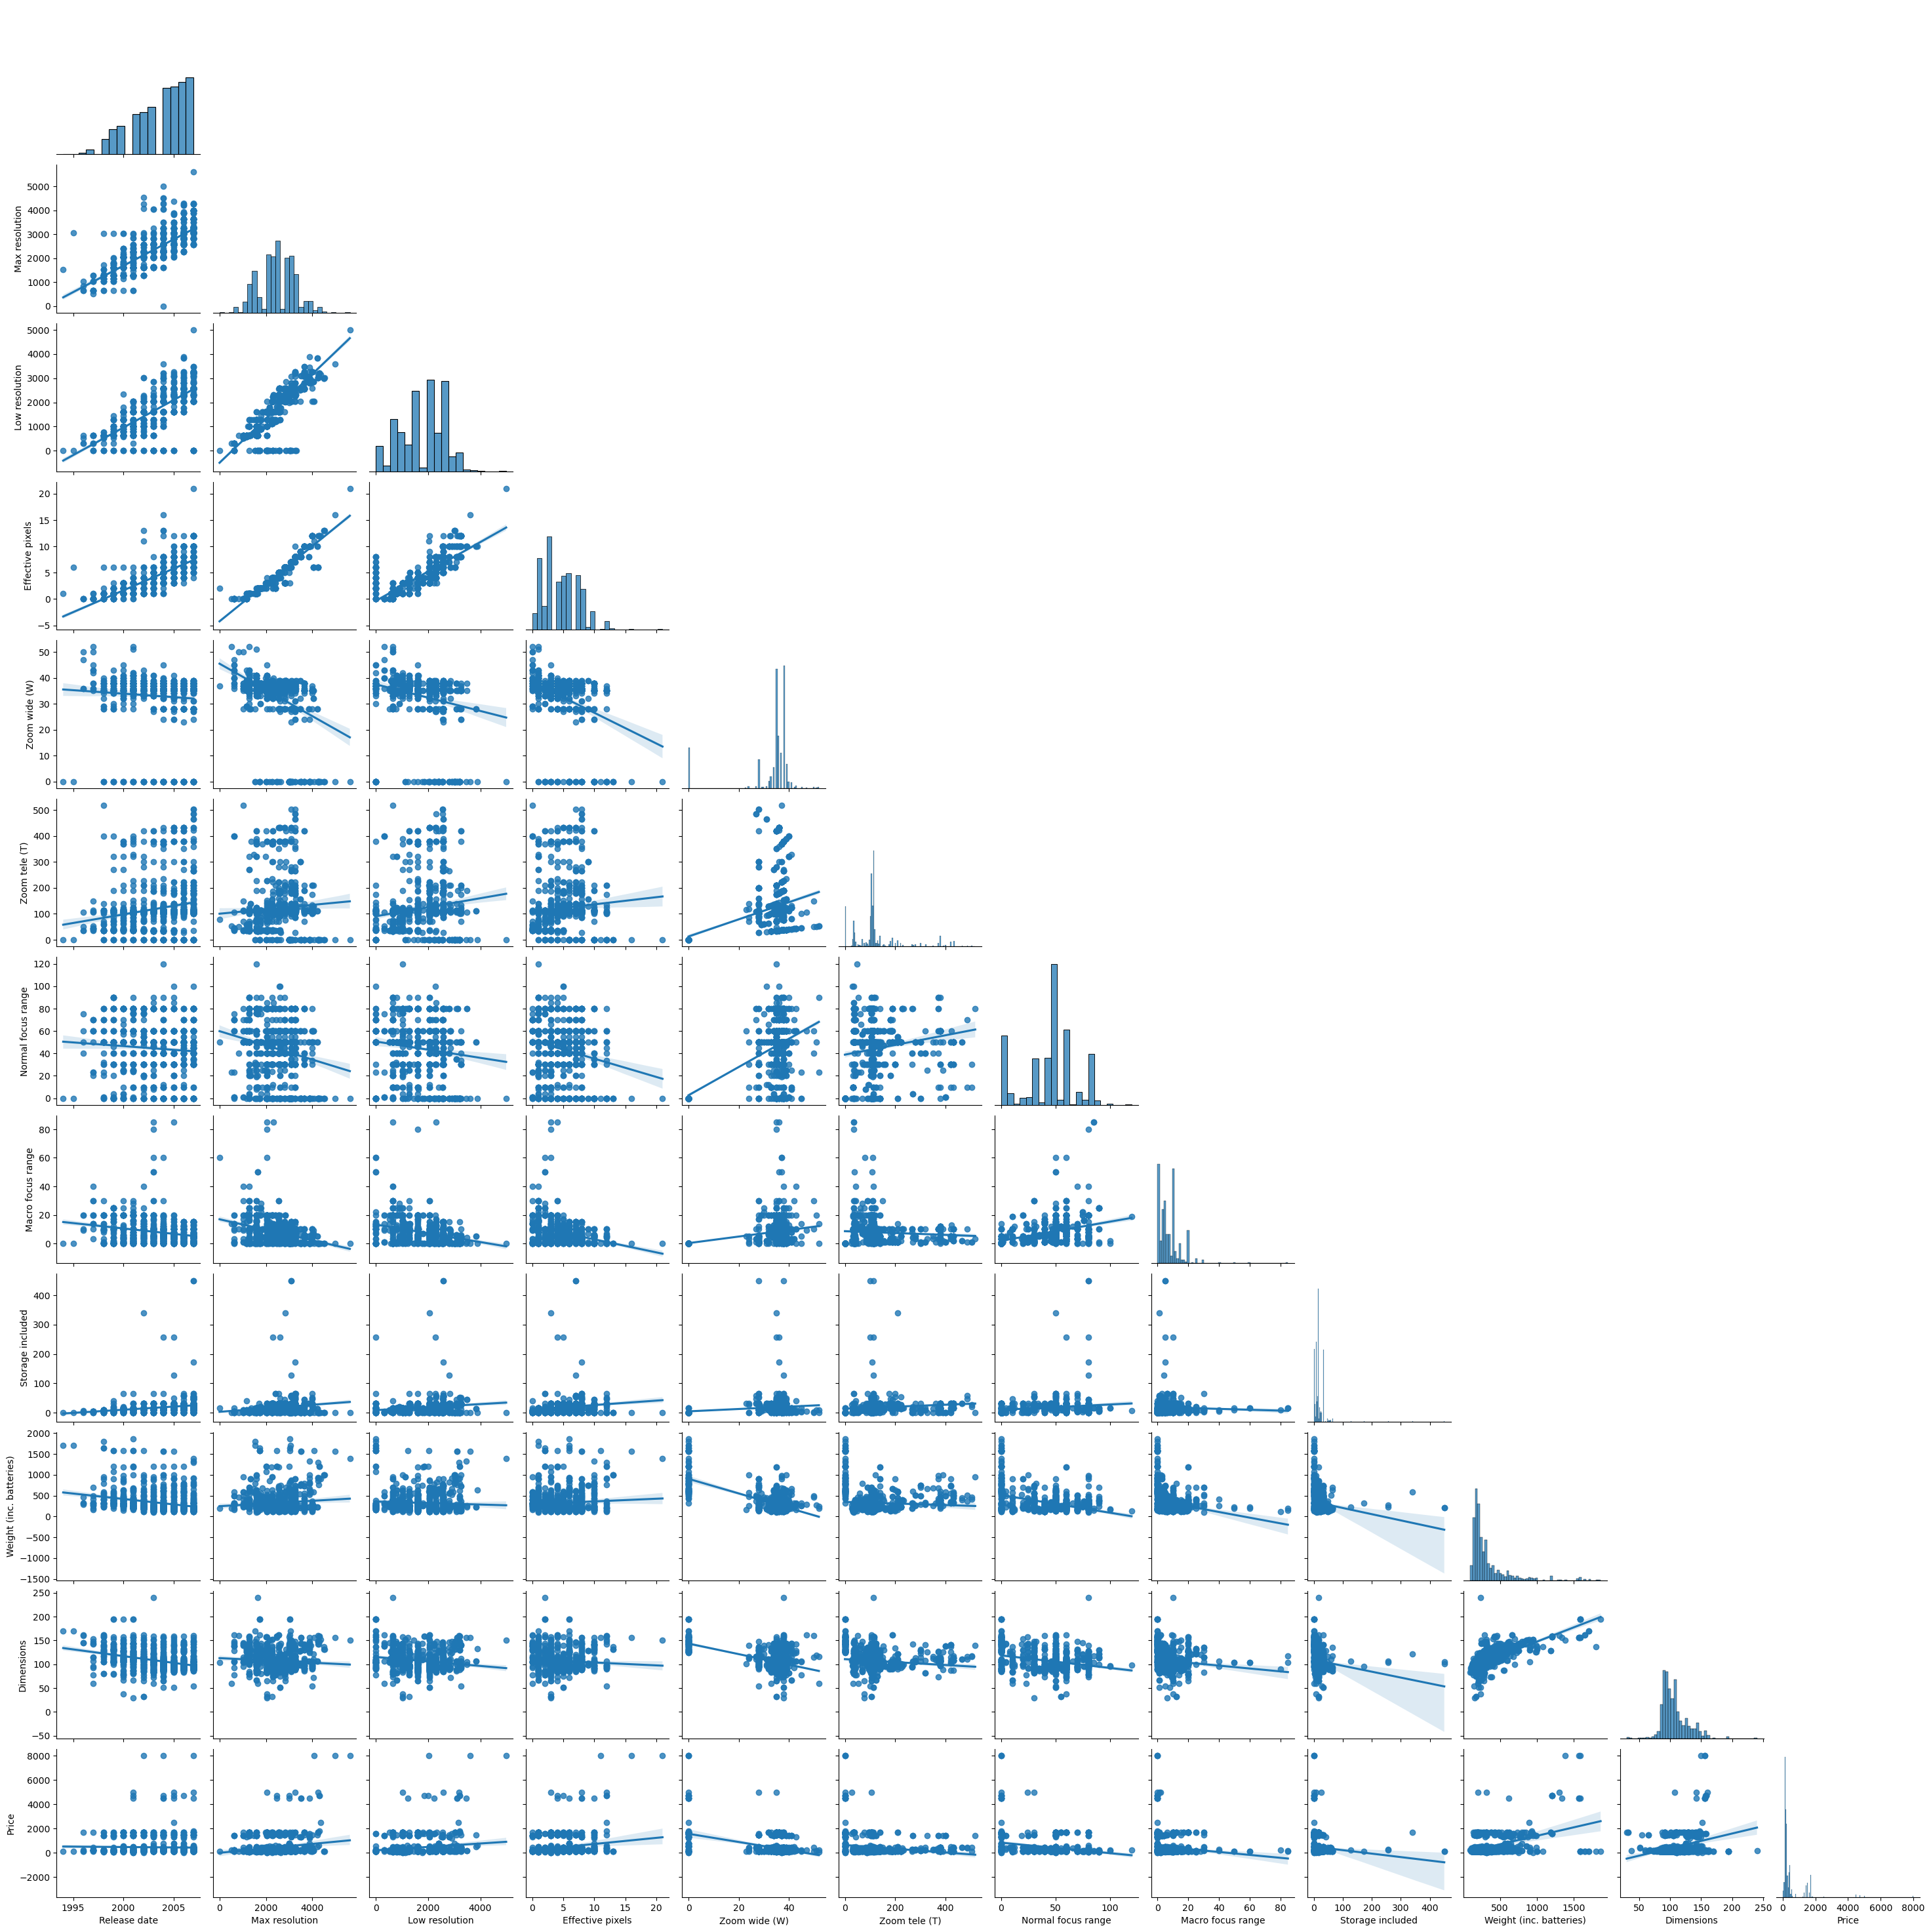

In [170]:
sns.pairplot(df, diag_kind="hist", corner=True, kind='reg')

## Outlier detection and removal using SD method, IQR and automatic outlier detection

### SD method

In [171]:
df_mean, df_std = df.mean(numeric_only=True), df.std(numeric_only=True)
cut_off = df_std * 3
lr, ur = df_mean - cut_off, df_mean + cut_off

# identify outliers
# outliers = [x for x in df_white if df_white[x][1] < lower[1] or df_white[x][1] > upper[1]]
# print('Identified outliers:',outliers)
# print(df[])

outliers = []
for i in df:
    if df[i].name == 'Model':
        continue
    if df[i][1] < lr[i] or df[i][1] > ur[i]:
        outliers.append(df[i][1])

# outliers = [x for x in df if df[x][1] < lr[1] or x[x][1] > ur[1]]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 0


### IQR

In [172]:
def outlierDetection(columnData):
  sorted(columnData)
  Q1,Q3 = np.percentile(columnData,[25,75])
  IQR = Q3 - Q1
  lr = Q1 - (1.5 * IQR)
  ur = Q3 + (1.5 * IQR)

  return lr,ur

In [173]:
data = df
print(data.shape)

for i in data.columns:
  if(i != 'Model'):
    lr,ur = outlierDetection(df[i])
    data = data[(data[i] >= lr) & (data[i] <= ur)]

data = data.reset_index(drop=True)
print(data.shape)

(1038, 13)
(510, 13)


### Automatic outlier detection

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error

# One class SVM is a classification algorithm that is used to detect outliers in both regression and classification problems.

def auto_outlier_detection(data, method, algorithm):
  data = data.values
  features, label = data[:,1:-1], data[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

  print(X_train.shape, y_train.shape)

  if method == 'OneClassSVM':
    algo = OneClassSVM(nu=0.01)

  elif method == 'IsolationForest':
    algo = IsolationForest(contamination=0.1)

  elif method == 'EllipticEnvelope':
   algo = EllipticEnvelope(contamination=0.1)
    
  else:
    algo = LocalOutlierFactor()

  if method != 'base':
    yhat = algo.fit_predict(X_train)
    mask = yhat != -1
    X_train, y_train = X_train[mask, :], y_train[mask]
    print(X_train.shape, y_train.shape)

  model = algorithm()
  # model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print('MAE Score: %.3f' % mae)


print('base', auto_outlier_detection(df, 'base', LinearRegression), '\n')
print('LocalOutlierFactor', auto_outlier_detection(df, 'LocalOutlierFactor', LinearRegression), '\n')
print('IsolationForest', auto_outlier_detection(df, 'IsolationForest', LinearRegression), '\n')
print('OneClassSVM', auto_outlier_detection(df, 'OneClassSVM', LinearRegression), '\n')
print('EllipticEnvelope', auto_outlier_detection(df, 'EllipticEnvelope', LinearRegression), '\n')

    

(830, 11) (830,)
MAE Score: 310.977
base None 

(830, 11) (830,)
(614, 11) (614,)
MAE Score: 304.230
LocalOutlierFactor None 

(830, 11) (830,)
(747, 11) (747,)
MAE Score: 297.686
IsolationForest None 

(830, 11) (830,)
(821, 11) (821,)
MAE Score: 291.206
OneClassSVM None 

(830, 11) (830,)
(747, 11) (747,)
MAE Score: 284.884
EllipticEnvelope None 



## Final train set using EllipticEnvelope (without outliers)

In [197]:
data = df.values
features, label = data[:,1:-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

model = EllipticEnvelope(contamination=0.1)
yhat = model.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(X_train.shape, y_train.shape)

train_df = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
train_df.columns = ['Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']

train_df

(747, 11) (747,)


,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,2004,2272.0,1600.0,4.0,38.0,114.0,60.0,10.0,16.0,160.0,104.0,169.0
1,2005,2592.0,2048.0,5.0,35.0,126.0,50.0,4.0,16.0,185.0,91.0,229.0
2,2004,2320.0,1280.0,4.0,35.0,105.0,50.0,6.0,32.0,205.0,96.0,179.0
3,2002,2048.0,1600.0,3.0,39.0,117.0,50.0,10.0,16.0,214.0,114.0,149.0
4,2007,3072.0,2592.0,7.0,38.0,112.0,40.0,15.0,20.0,155.0,95.0,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...
742,2004,2304.0,1600.0,4.0,35.0,105.0,40.0,6.0,9.0,150.0,87.0,329.0
743,2005,2304.0,2048.0,4.0,32.0,96.0,0.0,0.0,32.0,184.0,99.0,149.0
744,2004,2048.0,1620.0,3.0,35.0,114.0,80.0,5.0,0.0,157.0,108.0,229.0
745,2006,3648.0,3264.0,10.0,35.0,420.0,30.0,5.0,32.0,734.0,141.0,149.0


<AxesSubplot:>

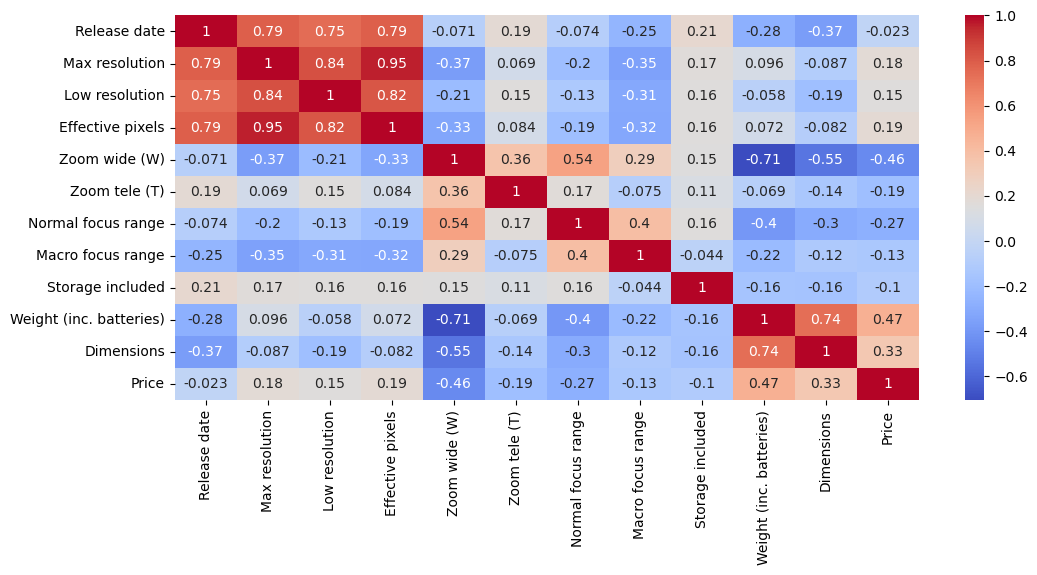

In [198]:
df_corr = df.corr(method='pearson')
plt.figure(figsize=(12, 5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

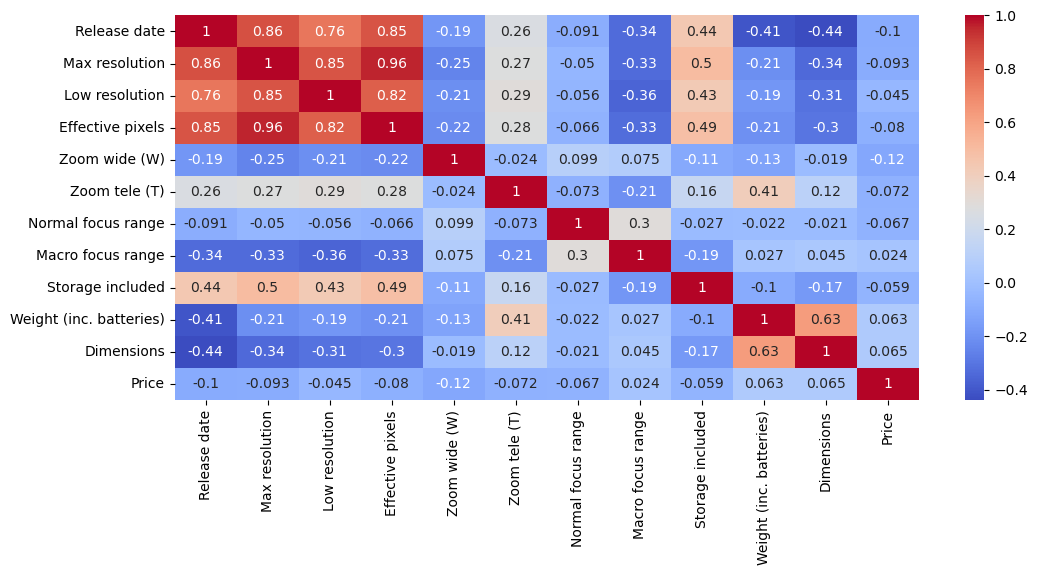

In [211]:
train_df = train_df.astype('float64')
train_df
df_corr = train_df.corr(method='pearson')
plt.figure(figsize=(12, 5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
# plt.figure(figsize=(12, 5))
# sns.heatmap(df_corr, annot=True, cmap='coolwarm')